In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

import random

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Reshape
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read images
images = np.zeros((1662,260,400))

for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i] = img

for i in range(81):
    filename = 'dataPavel/pavelEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480] = img
    
for i in range(74):
    filename = 'dataYannick/yannickEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+561] = img

for i in range(75):
    filename = 'dataKevin/kevinEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+635] = img 

for i in range(216):
    filename = 'dataAli/aliEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+710] = img
    
for i in range(209):
    filename = 'dataMarie/marieEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+926] = img
    
for i in range(199):
    filename = 'dataHelene/heleneEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1135] = img
       

for i in range(209):
    filename = 'dataJade/jadeEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1334] = img

for i in range(119):
    filename = 'dataYoussef/youssefEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1543] = img    

    
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Rescale images
images = images/255.
glintImages = images

def addGlint(image):
    #randGlint = random.randint(0,1)
    #if(randGlint):
    x = random.randint(10, 390)
    y = random.randint(10, 250)

    image[x-8:x+8, y-8:y+8] = 1
        
    return image

for image in images:
    image = addGlint(image)

images = np.concatenate((images, glintImages))

images.shape

(3324, 260, 400, 1)

In [3]:
# Read target values
target1 = pd.read_csv('dataOpenedEye/dataPupilCenter.csv')
target2 = pd.read_csv('dataPavel/pavelPupilCenter.csv')
target3 = pd.read_csv('dataYannick/yannickPupilCenter.csv')
target4 = pd.read_csv('dataKevin/kevinPupilCenter.csv')
target5 = pd.read_csv('dataAli/aliPupilCenter.csv')
target6 = pd.read_csv('dataMarie/mariePupilCenter.csv')
target7 = pd.read_csv('dataHelene/helenePupilCenter.csv')
target8 = pd.read_csv('dataJade/jadePupilCenter.csv')
target9 = pd.read_csv('dataYoussef/youssefPupilCenter.csv')
target = [target1, target2, target3, target4, target5, target6, target7, target8, target9]
target = pd.concat(target)

target = pd.concat((target, target))
target.shape

(3324, 5)

In [4]:
# Remove missing values
images = images[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(3180, 5)

In [5]:
# Put target data in shape
targetX = target['xcentral'].values.reshape((target['xcentral'].shape[0], 1))
targetY = target['ycentral'].values.reshape((target['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetX = targetX/400.
targetY = targetY/260.

targetTrain = np.concatenate((targetX, targetY), axis=1)
targetTrain.shape

(3180, 2)

In [6]:
# Data augmentation by adding horizontal mirror images
imagesFlipped = np.flip(images, axis=2)

targetFlipped = np.zeros(targetTrain.shape)
targetFlipped[:,0] = 1-targetTrain[:,0]
targetFlipped[:,1] = targetTrain[:,1]

images = np.concatenate((images, imagesFlipped), axis=0)
targetTrain = np.concatenate((targetTrain, targetFlipped), axis=0)

In [7]:
# Shuffle data
xtrain, ytrain = shuffle(images, targetTrain, random_state=0)
xvalid = xtrain[5000:]
#xtest = xtrain[2500:]
xtrain = xtrain[:5000]
yvalid = ytrain[5000:]
#ytest = ytrain[2500:]
ytrain = ytrain[:5000]

In [8]:
def model(Xshape):
    
    mod = Sequential()
    
    mod.add(Reshape((Xshape[0]*Xshape[1],), input_shape=(Xshape)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0001)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0001)))
    mod.add(Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0005)))
    mod.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [9]:
mymodel = model(xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [10]:
# First train with small mini batch size and default learning rate
mymodel.fit(xtrain, ytrain, epochs = 100, batch_size=64)

Epoch 1/100
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0280 - acc: 0.7016
Epoch 2/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0177 - acc: 0.8346
Epoch 3/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0143 - acc: 0.8730
Epoch 4/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0116 - acc: 0.8860
Epoch 5/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0106 - acc: 0.8728
Epoch 6/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0084 - acc: 0.9078
Epoch 7/100
5000/5000 [==============================] - 14s 3ms/step - loss: 0.0082 - acc: 0.9060
Epoch 8/100
5000/5000 [==============================] - 14s 3ms/step - loss: 0.0070 - acc: 0.9216
Epoch 9/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0069 - acc: 0.9166
Epoch 10/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0063 - acc: 0.9294
Epoch 11/

5000/5000 [==============================] - 13s 3ms/step - loss: 0.0036 - acc: 0.9256
Epoch 84/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0034 - acc: 0.9332
Epoch 85/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0040 - acc: 0.9208
Epoch 86/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0033 - acc: 0.9320
Epoch 87/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0050 - acc: 0.9220
Epoch 88/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0046 - acc: 0.9092
Epoch 89/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0033 - acc: 0.9324
Epoch 90/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0037 - acc: 0.9272
Epoch 91/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0032 - acc: 0.9340
Epoch 92/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0034 - acc: 0.9306
Epoch 93/100


In [11]:
# Then train with smaller learning rate and larger batch size
K.set_value(mymodel.optimizer.lr, 0.0005)
mymodel.fit(xtrain, ytrain, epochs = 10, batch_size=128)
K.set_value(mymodel.optimizer.lr, 0.0001)
mymodel.fit(xtrain, ytrain, epochs = 10, batch_size=256)
K.set_value(mymodel.optimizer.lr, 0.0001)
mymodel.fit(xtrain, ytrain, epochs = 10, batch_size=512)

Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0030 - acc: 0.9390
Epoch 2/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0027 - acc: 0.9418
Epoch 3/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0027 - acc: 0.9450
Epoch 4/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0026 - acc: 0.9458
Epoch 5/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0026 - acc: 0.9462
Epoch 6/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0026 - acc: 0.9444
Epoch 7/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0025 - acc: 0.9476
Epoch 8/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0024 - acc: 0.9486
Epoch 9/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0025 - acc: 0.9486
Epoch 10/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0025 - acc: 0.9462
Epoch 1/10
5000/5000 [=======

In [ ]:
# Plot the average distribution of all the images
averageImage = np.mean(1-xtrain, axis=0)
averageImage = np.reshape(averageImage, (averageImage.shape[0], averageImage.shape[1]))
print(averageImage.shape)

xproj = np.mean(averageImage*256, axis=1)

%matplotlib notebook
plt.plot(np.arange(0,260), xproj)
plt.show()
#plt.imshow(averageImage, cmap='gray')
#plt.show()



In [12]:
def performBarycenter(xinput, prediction, windowWidth=60, threshold = 0, ite=1):
    # Inverse values of the image
    inverseInput = (1-xinput)*256
    
    ypredictBary = np.copy(prediction)

    # remove the low values pixels
    lowValues = np.where(inverseInput<threshold)
    inverseInput[lowValues] = 0
    
    for iteration in range(0,ite):
        # Get the current center predicted
        centerX = (np.floor(ypredictBary[:,0]*400)).astype(int)
        centerY = (np.floor(ypredictBary[:,1]*260)).astype(int)

        for i in range(xinput.shape[0]):
            #print(i)

            baryValues = inverseInput[i,np.maximum(0,centerY[i]-windowWidth):np.minimum(260,centerY[i]+windowWidth), np.maximum(0,centerX[i]-windowWidth):np.minimum(400,centerX[i]+windowWidth)]
            baryValues = np.reshape(baryValues, (baryValues.shape[0], baryValues.shape[1]))
            baryCoordX = np.arange(np.maximum(0,centerX[i]-windowWidth), np.minimum(400,centerX[i]+windowWidth))
            baryCoordX = np.reshape(baryCoordX, (1, baryCoordX.shape[0]))
            baryCoordY = np.arange(np.maximum(0,centerY[i]-windowWidth), np.minimum(260,centerY[i]+windowWidth))
            baryCoordY = np.reshape(baryCoordY, (baryCoordY.shape[0], 1))

            #valuesYCorrection = xproj[]
            #valuesYCorrection = -78 + 0.30*baryCoordY
            #valuesYCorrection = (198-0.30*baryCoordY)/140
            #if i==0:
            #    print(valuesYCorrection)
            #baryValues = baryValues/valuesYCorrection

            baryY = np.multiply(np.square(baryValues), baryCoordY)
            baryX = np.multiply(np.square(baryValues), baryCoordX)
            tmpSum = np.sum(np.sum(np.square(baryValues)))

            #baryY = np.multiply(np.sqrt(baryValues), baryCoordY)
            #baryX = np.multiply(np.sqrt(baryValues), baryCoordX)
            #tmpSum = np.sum(np.sum(np.sqrt(baryValues)))

            ypredictBary[i, 0] = np.sum(np.sum(baryX))/tmpSum/400
            ypredictBary[i, 1] = np.sum(np.sum(baryY))/tmpSum/260
    
    return ypredictBary

X mean and stdev of diff train:  -0.00014789641723036767 0.02453353424197483
X mean and stdev of diff bary train:  -0.0019378183491528035 0.019914787667869797
Y mean and stdev of diff train:  0.00047819235622882845 0.0284956965287643
Y mean and stdev of diff bary train:  -0.008544754707813263 0.02329931951706234


<IPython.core.display.Javascript object>


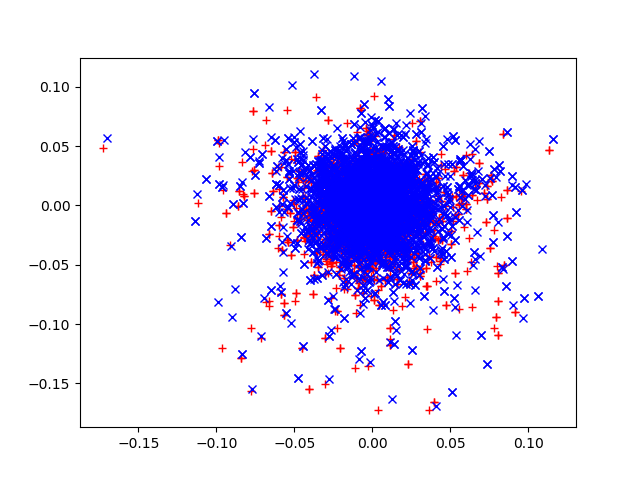

In [13]:
# Make the prediction on train
ypredict = mymodel.predict(xtrain)
ypredictBary = performBarycenter(xtrain, ypredict, 40, 190)

#ypredict = mymodel.predict(xtrain)

# Plot the diff between prediction and target values
diff = ypredict-ytrain
diffBary = ypredictBary-ytrain
#diffBary2 = ypredictBary2-ytrain

#diff = ypredict-ytrain

print('X mean and stdev of diff train: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('X mean and stdev of diff bary train: ', np.mean(diffBary[:,0]), np.std(diffBary[:,0]))
#print('X mean and stdev of diff bary train 2: ', np.mean(diffBary2[:,0]), np.std(diffBary2[:,0]))
print('Y mean and stdev of diff train: ', np.mean(diff[:,1]), np.std(diff[:,1]))
print('Y mean and stdev of diff bary train: ', np.mean(diffBary[:,1]), np.std(diffBary[:,1]))
#print('Y mean and stdev of diff bary train 2: ', np.mean(diffBary2[:,1]), np.std(diffBary2[:,1]))

%matplotlib notebook
plt.plot(diffBary[:,0], diffBary[:,1],'r+')
plt.plot(diff[:,0], diff[:,1],'bx')

plt.show()

In [ ]:
print(np.where(diffBary[:,0]<-0.2))

In [ ]:
#for i in range(len(ypredictBary)):
#    print(ypredictBary[i,0]*400-ypredict[i,0]*400)
#blabla = (ypredictBary[:,1]-ypredict[:,1])*400
#%matplotlib notebook
#plt.plot(ytrain[:,1]*260, blabla, 'r+')
#plt.show()

print(ypredict[0]*260)

X mean and stdev of diff train:  -0.0004201427622533896 0.027240439723345063
X mean and stdev of diff bary train:  -0.007379364816691069 0.020733552251181023
Y mean and stdev of diff train:  -2.7920020853771882e-05 0.035502553008253175
Y mean and stdev of diff bary train:  -0.020249325990238612 0.03126223830056193


<IPython.core.display.Javascript object>


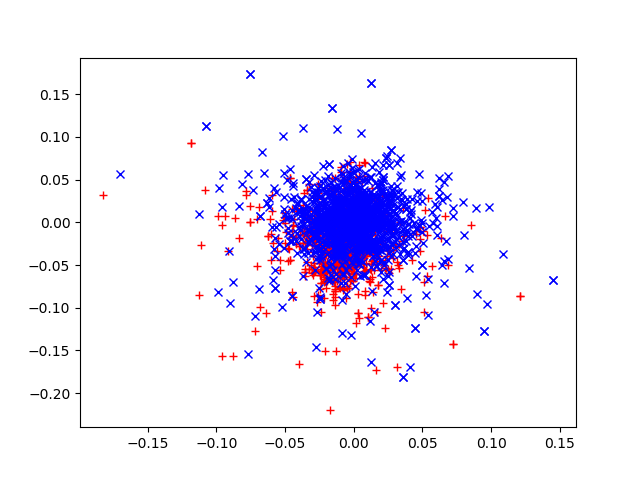

In [14]:
# Make the prediction on valid
ypredict = mymodel.predict(xvalid)
ypredictBary = performBarycenter(xvalid, ypredict, 40, 190, 5)
#ypredictBary = performBarycenter(xvalid, ypredictBary, 40, 190)

# Plot the diff between prediction and target values
diff = ypredict-yvalid
diffBary = ypredictBary-yvalid

#diff = diff[np.where(diff[:,1]<0.4)]

print('X mean and stdev of diff train: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('X mean and stdev of diff bary train: ', np.mean(diffBary[:,0]), np.std(diffBary[:,0]))
print('Y mean and stdev of diff train: ', np.mean(diff[:,1]), np.std(diff[:,1]))
print('Y mean and stdev of diff bary train: ', np.mean(diffBary[:,1]), np.std(diffBary[:,1]))

%matplotlib notebook
plt.plot(diffBary[:,0], diffBary[:,1],'r+')
plt.plot(diff[:,0], diff[:,1],'bx')

plt.show()

In [ ]:
# Plot the diff between prediction and target values
#diff = ypredict-targetTrain
yvalidpred = mymodel.predict(xvalid)
diffvalid = yvalidpred-yvalid

print('X mean and stdev of diff: ', np.mean(diffvalid[:,0]), np.std(diffvalid[:,0]))
print('Y mean and stdev of diff: ', np.mean(diffvalid[:,1]), np.std(diffvalid[:,1]))

%matplotlib notebook
plt.plot(diffvalid[:,0], diffvalid[:,1],'ro')
plt.show()

In [ ]:
badpoints = np.where(diffBary[:,0] < -0.15)
print(badpoints)
yvalid[badpoints]*400


In [ ]:
#%matplotlib notebook
index=20

display = np.reshape(xvalid[index], (260,400))
box = [0,0]#ypredictBary[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

X mean and stdev of diff train:  -0.010790986 0.025223834
X mean and stdev of diff bary train:  -0.0032957597 0.006186041
Y mean and stdev of diff train:  0.013877447 0.04795163
Y mean and stdev of diff bary train:  0.0075468784 0.006137855


<IPython.core.display.Javascript object>


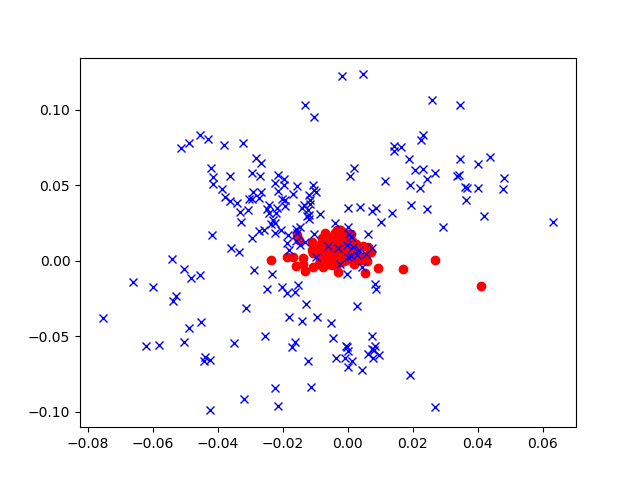

In [37]:
# Make the prediction on a totally new dataset
# Read images
newImages = np.zeros((201,260,400))

for i in range(201):
    filename = 'dataFabrice/fabriceEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    newImages[i] = img

        
newImages = np.reshape(newImages, (newImages.shape[0], newImages.shape[1], newImages.shape[2], 1))

# Rescale images
newImages = newImages/255.

targetValid = pd.read_csv('dataFabrice/fabricePupilCenter.csv')

# Remove missing values
newImages = newImages[targetValid.xcentral != '?']
targetValid = targetValid[targetValid.xcentral != '?']
targetValid = targetValid.astype('float32')

# Put target data in shape
targetValidX = targetValid['xcentral'].values.reshape((targetValid['xcentral'].shape[0], 1))
targetValidY = targetValid['ycentral'].values.reshape((targetValid['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetValidX = targetValidX/400.
targetValidY = targetValidY/260.

targetValid = np.concatenate((targetValidX, targetValidY), axis=1)

# Make the prediction for valid dataset
newImagesPredict = mymodel.predict(newImages)
newImagesPredictBary = performBarycenter(newImages, newImagesPredict, 40, 190, 30)
#newImagesPredictBary = performBarycenter(newImages, newImagesPredictBary, 40, 190)

# Plot the diff between prediction and target values
diff = newImagesPredict-targetValid
diffBary = newImagesPredictBary-targetValid

print('X mean and stdev of diff train: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('X mean and stdev of diff bary train: ', np.mean(diffBary[:,0]), np.std(diffBary[:,0]))
print('Y mean and stdev of diff train: ', np.mean(diff[:,1]), np.std(diff[:,1]))
print('Y mean and stdev of diff bary train: ', np.mean(diffBary[:,1]), np.std(diffBary[:,1]))

%matplotlib notebook
plt.plot(diffBary[:,0], diffBary[:,1],'ro')
plt.plot(diff[:,0], diff[:,1],'bx')

plt.show()

In [38]:
badpoints = np.where(diffBary[:,0]>0.01)
badpoints

(array([81, 85, 94], dtype=int64),)

center prediction:  167.8051471710205 122.13842153549194


<IPython.core.display.Javascript object>


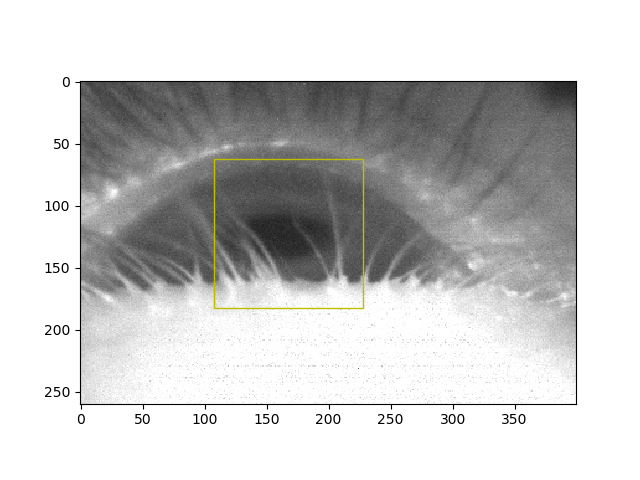

In [41]:
# Image to display
index=94

display = np.reshape(newImages[index], (260,400))
box = newImagesPredictBary[index]

print('center prediction: ',box[0]*400, box[1]*260)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [16]:
#model saving
mymodel.save('myMLP8layersModelglintsAllImageTwiceBis.h5')  #saves the model architecture and weights
mymodel.save_weights('myMLP8layersModelglintsAllImageTwiceBis_weights.h5') #saves only the weights